<h2>LU разложение</h2>

In [1]:
def create_I_matrix(x):  # x - размерность матрицы
    A = []
    for i in range(x):
        A.append([0]*x)
        A[i][i] = 1
    return A
def solution(A, q, b):
    # q определяет A - это нижняя треугольная матрица или верхняя
    n = len(A)
    x = []
    if q:
        for i in range(n):
            x.append([0] * len(b[i]))
            for k in range(len(b[i])):
                for j in range(i+1):
                    if i == j:
                        x[i][k] += b[i][k] / A[i][i]
                    else:
                        x[i][k] -= A[i][j] * x[j][k] / A[i][i]
    else:
        for i in range(n):
            x.append([0] * len(b[i]))
        for i in range(n-1, -1, -1):
            for k in range(len(b[i])):
                for j in range(n-1, i-1, -1):
                    if i == j:
                        x[i][k] += b[i][k] / A[i][i]
                    else:
                        x[i][k] -= A[i][j] * x[j][k] / A[i][i]
    return x


def create_matrix(x, y):  # x - размерность матрицы
    A = []
    for i in range(x):
        A.append([0]*y)
    return A
def matrix_product(A, B):
    n = len(A)
    m = len(B[0])
    R = create_matrix(n, m)
    for i in range(n):
        for j in range(m):
            for k in range(n):
                R[i][j] += A[i][k] * B[k][j]
    return R

def LU(A):  # Собственно реализация LU разложения
    U = []
    for i in A:
        U.append(i.copy())
    n = len(A)
    L = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            # Выбор главного элемента
            m = j
            for k in range(j+1, n):
                if U[i][k] > U[i][m]:
                    m = k
            if m != j:
                for k in range(n):
                    x = U[i][m]
                    U[i][m] = U[i][j]
                    U[i][j] = x

            U[0][i] = A[0][i]
            L[i][0] = A[i][0] / U[0][0]
            sum = 0
            for k in range(i):
                sum += L[i][k] * U[k][j]
            U[i][j] = A[i][j] - sum
            if (i > j):
                L[j][i] = 0
            else:
                sum = 0
                for k in range(i):
                    sum += L[j][k] * U[k][i]
                L[j][i] = (A[j][i] - sum) / U[i][i]
    return L, U


<h5>Метод половинного деления

In [2]:
from numpy import sign
def half(a,b,f,e):
    sign_fa = sign(f(a))
    sign_fc = 0
    while e < (b-a):
        c = (a + b)  / 2
        sign_fc = sign(f(c))
        if sign_fa * sign_fc > 0:
            a = c
        else:
            b = c
    return c

<h1 alingn="center">Вариант 24 </h1>

In [14]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 2 * e ** x - 2 * x + 3
def f_sh(x):
    return 2*e**x - 2
def M(x):
    return 2*e**x, 2*e**x, 2*e**x
a, b = 1, 2
n = 5
var = "24"
# Создание таблицы (xi,fi)
x_mas = np.arange(a, b+0.00000000000001, (b-a) / n)
f_mas = []
for i in x_mas:
    f_mas.append(f(i))

# Возвращает интеграл произведения функции на g[i]
def Int_b(a,b):
    return [
        [
        2 * e ** b - b**2 + 3 * b - (2 * e ** a - a**2 + 3 * a )
        ],
        [
        e ** b * (2*b-2) - 2*b**3/3 + 3*b**2/2 - (e ** a * (2*a-2) - 2*a**3/3 + 3*a**2/2)
        ],
        [
        e ** b * (2*b**2-4*b+4)-1/2*b**4+b**3 - (e ** a * (2*a**2-4*a+4)-1/2*a**4+a**3)
        ]
    ]

<h1 alingn="center">Вариант 25 </h1>

In [4]:
from math import e, log
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 3 ** x + 2 - x
def f_sh(x):
    return 3**x * log(3) - 1
def M(x):
    return 3**x*log(3)**6,  3**x*log(3)**5,  3**x*log(3)**4
a, b = 1, 2
n = 5
var = "25"
# Создание таблицы (xi,fi)
x_mas = np.arange(a, b+0.00000000000001, (b-a) / n)
f_mas = []
for i in x_mas:
    f_mas.append(f(i))

# Возвращает интеграл произведения функции на g[i]
def Int_b(a,b):
    return [
        [
        3**b/log(3) - 1/2*b**2 + 2*b - (3**a/log(3) - 1/2*a**2 + 2*a)
        ],
        [
        (log(3)*b-1) * 3**b/(log(3))**2 - (b-3)*b**2/3 - ((log(3)*a-1) * 3**a/(log(3))**2 - (a-3)*a**2/3)
        ],
        [
        (log(3)*b*(log(3)*b-2)+2)*3**b/(log(3)**3) - b**3 * (3*b-8) / 12 - ((log(3)*a*(log(3)*a-2)+2)*3**a/(log(3)**3) - a**3 * (3*a-8) / 12)
        ]
    ]

<h1>Интерполяционный метод Ньютона

In [5]:
# Создание таблицы разделенных разностей
def div_dif(x, y, i, j, f_dict):
    if x[i] > x[j]:
        x[i], x[j] = x[j], x[i]
    if (x[i], x[j]) in f_dict:
        return f_dict[(x[i], x[j])]
    if i == j - 1:
        f_dict[(x[i], x[j])] = (y[j] - y[i]) / (x[j] - x[i])
        return f_dict[(x[i], x[j])]
    else:
        f_dict[(x[i], x[j])] = (div_dif(x, y, i+1, j, f_dict) - div_dif(x, y, i, j-1, f_dict)) / (x[j] - x[i])
        return f_dict[(x[i], x[j])]

def int_new_prep(x_mas, y_mas):
    f_dict = {}
    div_dif(x_mas, y_mas, 0, len(x_mas)-1, f_dict)
    return f_dict
# Интерполяция методом Ньютона
def int_new(x_mas, y_mas, x, f_dict):
    s = 0
    prod = 1
    ind = []
    for i in enumerate(x_mas):
        if i[0] == 0:
            s += y_mas[0] 
        else:
            prod *= (x - x_mas[i[0] -1])
            ind.append((x - x_mas[i[0] -1]))
            s += prod * f_dict[(x_mas[0], i[1])] 
    return s, ind

  Вариант 25
 Интерполяционная формула Ньютона 
 Таблица разделенных разностей
 От                    До                     Значение
1.7999999999999998    1.9999999999999998    7.87662972078962         
1.5999999999999999    1.7999999999999998    6.125639605233936        
1.5999999999999999    1.9999999999999998    4.377475288889211        
1.4                   1.5999999999999999    4.720047065246043        
1.4                   1.7999999999999998    3.5139813499697334       
1.4                   1.9999999999999998    1.4391565648657958       
1.2                   1.4                   3.5917195144976386       
1.2                   1.5999999999999999    2.8208188768710123       
1.2                   1.7999999999999998    1.1552707884978688       
1.2                   1.9999999999999998    0.3548572204599088       
1.0                   1.2                   2.6859640942327583       
1.0                   1.4                   2.2643885506622015       
1.0                   1.59

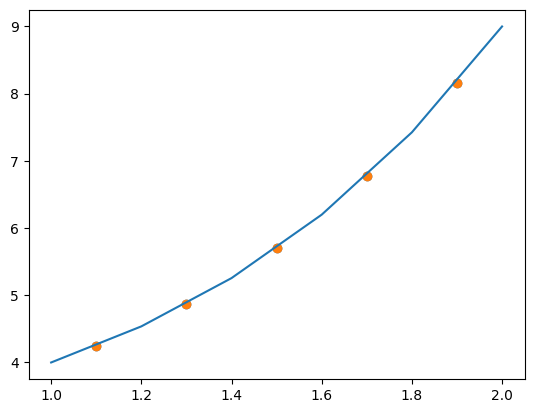

In [6]:

x1 = np.arange(a + (b-a) / (2 * n), b - (b-a) / (2 * n)+0.00000000000001, (b-a) / n)
y1 = []
for i in x1:
    y1.append(f(i))
fd = int_new_prep(x_mas, f_mas)
print("""  Вариант {}
 Интерполяционная формула Ньютона 
 Таблица разделенных разностей
 От                    До                     Значение""".format(var))
for i in fd.items():
    print("{:<20}  {:<20}  {:<25}".format(i[0][0], i[0][1],i[1]))
mmm = M(x_mas[-1])
print("M6 = {}".format(mmm[0]))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format("x","f(x)","Pn(x)","Delta", "Оценка"))
y2_new, ind_mas_new = [], []
factorial = 1
for i in range(len(x_mas)):
    factorial *= i + 1
for i in x1:
    temp = int_new(x_mas, f_mas, i, fd)
    ind_mas_new.append(temp[1])
    y2_new.append(temp[0])
    omega = 1
    for j in range(len(x_mas)):
        omega *= i - x_mas[j]
    print("{:<20} {:<25} {:<25} {:<25} {:<25}".format(
        i, f(i), temp[0], abs(f(i)-temp[0]), abs(mmm[0] * omega / factorial)
    ))
plt.plot(x_mas, f_mas)
plt.scatter(x1,y1)
plt.scatter(x1,y2_new)
plt.show()

<h1>Метод кубических сплайнов дефекта 1

In [15]:

def phi_0(tau):
    return (1 + 2 * tau) * (1-tau)**2
def phi_1(tau):
    return tau * (1-tau)**2
def s31(x, x_mas, f_mas, m):
    h = (b - a) / n
    i = 0
    while x > x_mas[i]:
        i += 1
    i -= 1  
    tau = (x - x_mas[i]) / (h)
    return phi_0(tau) * f_mas[i] + phi_0(1-tau)*f_mas[i+1] + (h) * (phi_1(tau) * m[i] - phi_1(1-tau) * m[i+1])
def cs(tri_v, f):
    x = [0]*len(f)
    a, c, b = tri_v
    alpha = [0]*len(f)
    beta = [0]*len(f)
    alpha[1] = -b/c
    beta[1] = f[0] / c
    for j in range(1, len(f)-1):
        den = c + a * alpha[j]
        alpha[j+1] = -b / den
        beta[j+1] = (f[j] - a * beta[j]) / den
    
    x[-1] = (f[-1] - a * beta[-1]) / (c + a * alpha[-1])
    for j in range(len(f)-2, -1, -1):
        x[j] = alpha[j+1] * x[j+1] + beta[j+1]
    return x


   Интерполяция кубическим сплайном

 M5=14.403391726638862
x[i]                 df/dx(x[i])               m[i]                      Delta                     Оценка                   
1.1                  4.008332047892867         6.80830877161088          2.7999767237180135        0.0003840904460437031    
1.3                  5.338593335238488         7.738562732253275         2.399969397014787         0.0003840904460437031    
1.5                  6.963378140676129         8.963340977681582         1.9999628370054534        0.0003840904460437031    
1.7                  8.947894783454398         10.547850703436554        1.5999559199821558        0.0003840904460437031    
1.9                  11.371788884558537        12.571729585662386        1.1999407011038485        0.0003840904460437031    


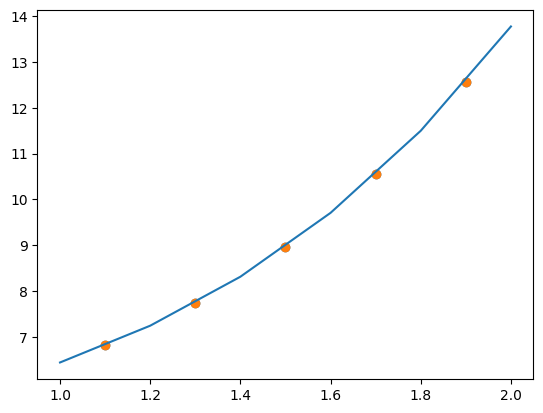

In [16]:
x1 = np.arange(a + (b-a) / (2 * n), b - (b-a) / (2 * n)+0.00000000000001, (b-a) / n)
y1 = []
for i in x1:
    y1.append(f(i))
y2_cub, ind_mas_cub = [], []
hh = (b-a) / n
print("""   Интерполяция кубическим сплайном

 M5={}""".format(mmm[1]))

m = [0]*(len(x_mas))
res = [0]*(len(x_mas)-2)
m[0] = f_sh(x_mas[0])
m[-1] = f_sh(x_mas[-1])
tri_v = [0.5, 2, 0.5]
for i in range(len(x_mas)-2):
    # res[i] = 1.5 / (hh) * (f_mas[i+2] - f_mas[i])
    res[i] = 1.5 / ((x_mas[i+1] - x_mas[i])) * (f_mas[i+2] - f_mas[i])
res[0] -= 0.5 * m[0]
res[-1] -= 0.5 * m[-1]
mm = cs(tri_v, res)
mm = [m[0], *mm, m[-1]]


print("{:<20} {:<25} {:<25} {:<25} {:<25}".format("x[i]","df/dx(x[i])","m[i]","Delta", "Оценка"))
for i in x1:
    # temp = cubic_spline(x_mas, f_mas, i)
    temp = s31(i, x_mas, f_mas, mm)
    # ind_mas_cub.append(temp[1])
    y2_cub.append(temp)
    print("{:<20} {:<25} {:<25} {:<25} {:<25}".format(
        i, f_sh(i), temp, abs(abs(f_sh(i)) - abs(temp)), mmm[1] / 60 * hh**4
    ))
plt.plot(x_mas, f_mas)
plt.scatter(x1,y1)
plt.scatter(x1,y2_cub)
plt.show()

<h2>Среднеквадратичное приближение

   Среднеквадратичное приближение
Дискретный вариант
Матрица
6.0                  9.0                  14.2                 
9.0                  14.2                 23.39999999999999    
14.2                 23.39999999999999    39.966399999999986   
Вектор правых частей
36.41694973122999    58.08606990924856    96.76119167976557    
P2(x)=(5.52791995161924) + (-4.722919686489996)*x + (3.222232901403135)*x^2
Норма погрешности = 0.07554271170056698
x                    Погрешность              
1.0                  -0.027233166532379727    
1.2                  0.036761112994792455     
1.4                  0.02412784446268912      
1.5999999999999999   -0.020618546031982987    
1.7999999999999998   -0.04202506064132905     
1.9999999999999998   0.028987815748211077     


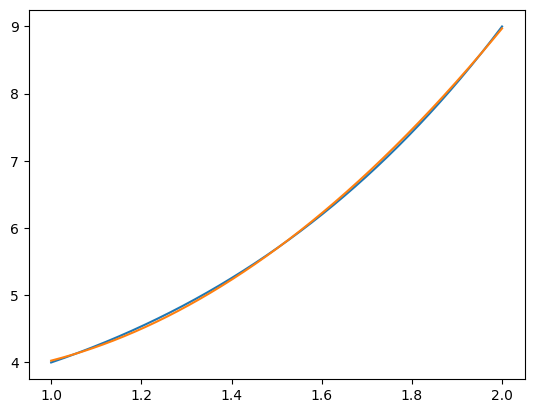

[[5.52791995161924], [-4.722919686489996], [3.222232901403135]]


In [9]:
from math import sqrt
def MakeSystem( x_mas, f_mas, basis):
    matrix = []
    b = []
    for i in range(basis):
        matrix.append([])
        b.append([0])
        for j in range(basis):
            matrix[i].append(0) 
    for  i in range(basis):
        for j in range(basis):
            sumA, sumB = 0, 0
            for k in enumerate(x_mas):
                sumA += k[1] ** i * k[1] ** j
                sumB += f_mas[k[0]] * k[1] ** i
            matrix[i][j] = sumA;
            b[i][0] = sumB;
    return matrix, b


A, B = MakeSystem(x_mas, f_mas, 3)
L, U = LU(A)
y = solution(L, True, B)
x = solution(U, False, y)
x_m = np.arange(a, b+0.00000000000001, 0.001)
f_m = []
apr_m = []
ff = lambda t: x[2][0] * t**2 + x[1][0] * t + x[0][0]
print("""   Среднеквадратичное приближение
Дискретный вариант
Матрица""")
for i in A:
    for j in i:
        print("{:<20}".format(j), end=" ")
    print()
print("Вектор правых частей")
for i in B:
    print("{:<20}".format(i[0]), end=" ")
print("\nP2(x)=({}) + ({})*x + ({})*x^2".format(x[0][0], x[1][0],x[2][0]))
fs = 0
ffs = 0
for i in x_mas:
    fs += f(i)**2
    ffs += ff(i)**2
s = (fs - ffs) ** (1/2) 
print("Норма погрешности = {}".format(s))
print("{:<20} {:<25}".format("x","Погрешность"))
for i in x_m:
    f_m.append(f(i))
    apr_m.append(ff(i))
y1 = []
for i in x_mas:
    y1.append(f(i))
    print("{:<20} {:<25}".format(i, f(i) - ff(i)))
plt.plot(x_m, f_m, x_m, apr_m)
plt.show()
print(x)

Непрерывный вариант
Матрица
1                    1.5                  2.333333333333333    
1.5                  2.333333333333333    3.75                 
2.333333333333333    3.75                 6.2                  
Вектор правых частей
5.9614353597610235   9.349042367927892    15.148483258152979   
P2(x)=(3.20389809327505) + (-4.729022340388912)*x + (5.579206652702609)*x^2
Норма погрешности = 0.7244356058309877
x                    Погрешность              
1.0                  -0.05408240558874766     
1.2                  0.019199720294564848     
1.4                  0.01732108276884947      
1.5999999999999999   -0.015203892069189706    
1.7999999999999998   -0.02292220637165432     
1.9999999999999998   0.06324565497501489      


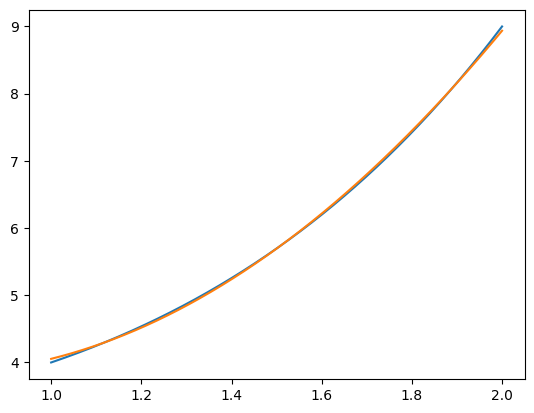

[[5.579206652702609], [-4.729022340388912], [3.20389809327505]]


In [10]:
def g_matrix(a, b):
    return [
        [b-a, (b**2/2)-(a**2/2), (b**3/3)-(a**3/3)],
        [(b**2/2)-(a**2/2), (b**3/3)-(a**3/3), (b**4/4)-(a**4/4)],
        [(b**3/3)-(a**3/3), (b**4/4)-(a**4/4), (b**5/5)-(a**5/5)]
    ]


A, B = g_matrix(a,b), Int_b(a,b)
L, U = LU(A)
y = solution(L, True, B)
x = solution(U, False, y)
x_m = np.arange(a, b+0.00000000000001, 0.001)
f_m = []
apr_m = []
ff = lambda t: x[2][0] * t**2 + x[1][0] * t + x[0][0]

print("""Непрерывный вариант
Матрица""")
for i in A:
    for j in i:
        print("{:<20}".format(j), end=" ")
    print()
print("Вектор правых частей")
for i in B:
    print("{:<20}".format(i[0]), end=" ")
print("\nP2(x)=({}) + ({})*x + ({})*x^2".format(x[2][0], x[1][0],x[0][0]))
fs = 0
ffs = 0
for i in x_mas:
    fs += f(i)**2
    ffs += ff(i)**2
s = (fs - ffs) ** (1/2) 
print("Норма погрешности = {}".format(s))
print("{:<20} {:<25}".format("x","Погрешность"))
y1 = []
for i in x_mas:
    y1.append(f(i))
    print("{:<20} {:<25}".format(i, f(i) - ff(i)))

for i in x_m:
    f_m.append(f(i))
    apr_m.append(ff(i))
plt.plot(x_m, f_m, x_m, apr_m)
plt.show()
print(x)

<h2>Равномерное приближение

In [11]:
c1 = (f_mas[-1] - f_mas[0]) / (b - a)
d = half(a, b, lambda x: f_sh(x) - c1, 1e-6)
c0 = (f_mas[0] + f(d) - c1 * (a + d)) / 2
def p1(x):
    return c0 + c1 * x 
def L(x):
    return f(x) - (p1(x))
print("P1(x) = {} + {} * x".format(c0, c1))
print("d = {}".format(d))
print("L(a) = {}, \tL(d) = {}, \tL(B) = {}".format(L(a),L(d),L(b)))
print("      x               Погрешность")
for i in enumerate(x_mas):
    print("{:<20}  {:<25}".format(i[1], f_mas[i[0]] - p1(i[1])))

P1(x) = -1.4052535152063692 + 4.999999999999998 * x
d = 1.545323371887207
L(a) = 0.405253515206371, 	L(d) = -0.4052535152063719, 	L(B) = 0.4052535152063719
      x               Погрешность
1.0                   0.405253515206371        
1.2                   -0.05755366594707656     
1.4                   -0.339209763047549       
1.5999999999999999    -0.39520034999833964     
1.7999999999999998    -0.17007242895155272     
1.9999999999999998    0.40525351520637365      


<h2> Решение уравнения методом обратной интерполяции

In [12]:
f_c = []
c = (f_mas[-1] + f_mas[0]) / 2

for i in f_mas:
    f_c.append(i - c)

def sol_prep():
    f_dict = {}
    div_dif(f_c, x_mas, 0, len(f_c)-1, f_dict)
    return f_dict
print("Решение уравнения методом обратной интерполяции\nТаблица разделенных разностей")
for i in sol_prep().items():
    print("{:<20}    {:<20}  || {:<30}".format(i[0][0], i[0][1], i[1]))

ans, j =  int_new(f_c, x_mas, 0, sol_prep())
print("""
c = {}
корень = {}  
Невязка = Abs(f(x) - c) = {}""".format(c, ans, abs(f(ans) - c)))

Решение уравнения методом обратной интерполяции
Таблица разделенных разностей
0.9246740558420754      2.499999999999999     || 0.12695785322504047           
-0.3004538652047115     0.9246740558420754    || 0.16324825886680783           
-0.3004538652047115     2.499999999999999     || -0.01295875861147763          
-1.24446327825392       -0.3004538652047115   || 0.21186229420529573           
-1.24446327825392       0.9246740558420754    || -0.02241169084794171          
-1.24446327825392       2.499999999999999     || 0.0025245092644818456         
-1.9628071811534475     -1.24446327825392     || 0.27841817713315137           
-1.9628071811534475     -0.3004538652047115   || -0.04003714630897882          
-1.9628071811534475     0.9246740558420754    || 0.006104093503782111          
-1.9628071811534475     2.499999999999999     || -0.0008020925157638325        
-2.499999999999999      -1.9628071811534475   || 0.37230579595132246           
-2.499999999999999      -1.24446327825392 

In [13]:
def estimate(ind_mas, f, e):
    fe = f(e)
    m = []
    for i in ind_mas:
        n = 1
        s = 1
        for omega in i:
            s *= fe * omega / n
            n += 1
        m.append(s)
    return m

new = estimate(ind_mas_new, f, 10**(-10))
cub = estimate(ind_mas_cub, f, 10**(-10))
print("{:<25}  {:<25}  {:<25}  {:<25}".format("F(x)", "Настоящая погрешность", "Оценка погрешности", "Разность ОП и НП"))
for i in enumerate(x1):
    df = f(i[1]) - y2_new[i[0]]
    print("{:<25}  {:<25}  {:<25}  {:<25}".format(f(i[1]), df, new[i[0]], abs(new[i[0]]) - abs(df) ))
print("-"*108)
for i in enumerate(x1):
    df = f(i[1]) - y2_cub[i[0]]
    print("{:<25}  {:<25}  {:<25}  {:<25}".format(f(i[1]), df, cub[i[0]], abs(cub[i[0]]) - abs(df)))
print(new)
print(cub)

F(x)                       Настоящая погрешность      Оценка погрешности         Разность ОП и НП         
4.248369522101713          -1.13639971157653e-05      0.0021262500000349426      0.0021148860029191773    
4.871167510947728          3.904375158292339e-06      -0.0009112500000149759     0.0009073456248566836    
5.696152422706632          -2.876566765230848e-06     0.0009112500000149764      0.0009083734332497455    
6.773007839923779          4.156939480637334e-06      -0.002126250000034946      0.0021220930605543088    
8.163626138566858          -1.2882429837546283e-05    0.019136250000314537       0.01912336757047699      
------------------------------------------------------------------------------------------------------------


IndexError: list index out of range